In [1]:
import copy

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
day = 0
df = pd.read_csv(f"../round2_new/round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=";", header=0)
trade_df = pd.read_csv(f"../round2_new/round-2-island-data-bottle/trades_round_2_day_{day}.csv", sep=";", header=0)
df_ink = copy.deepcopy(df[df['product'] == 'SQUID_INK'])
df_ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
5,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
9,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
16,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0
24,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0
37,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79961,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
79970,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
79981,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
79984,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


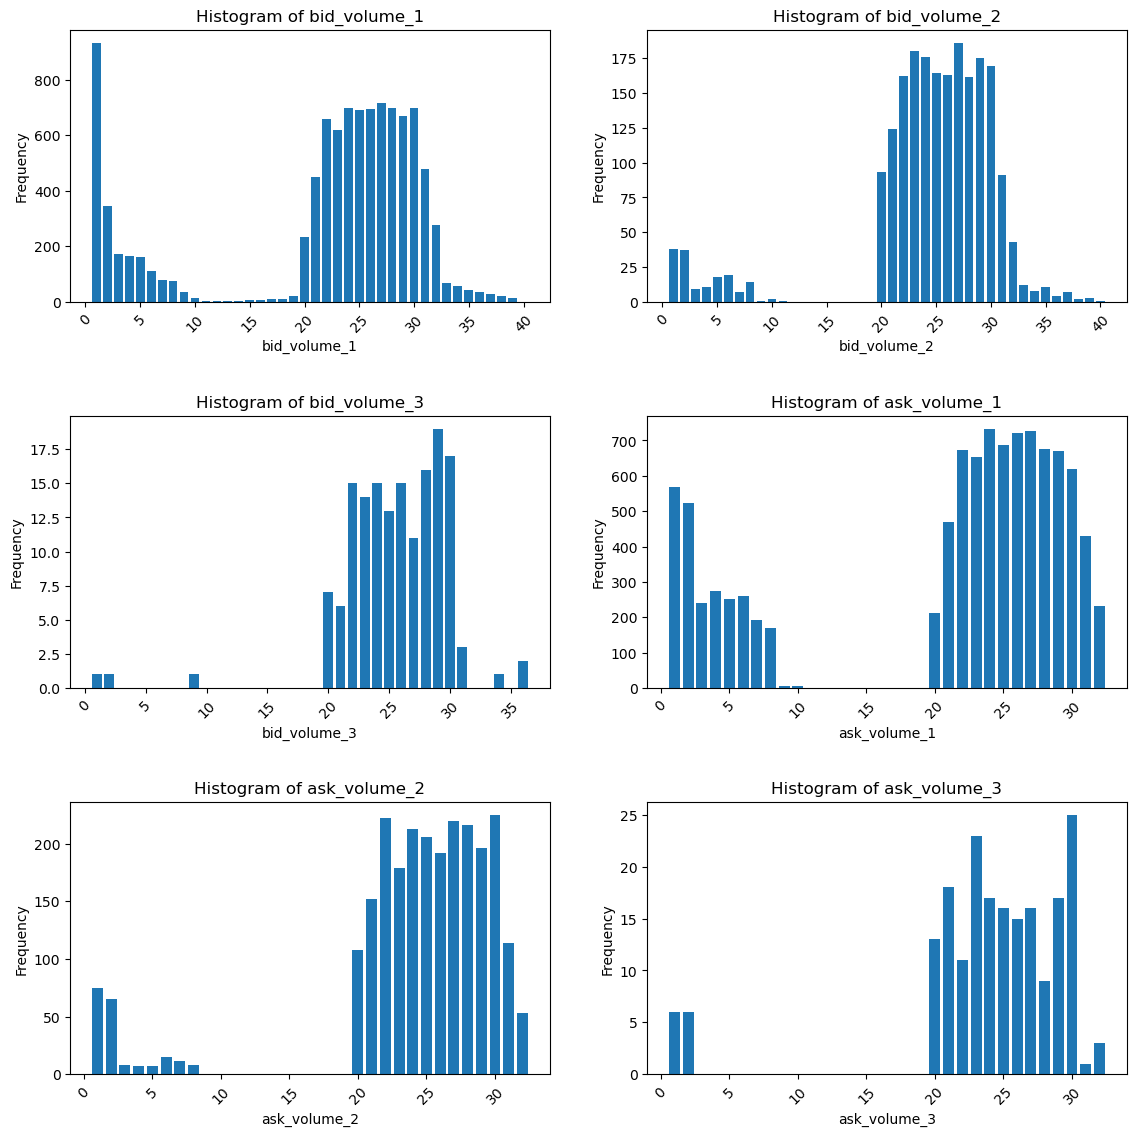

In [3]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)

    volume_counts = df_ink[column].value_counts()

    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [4]:
df_ink['spread'] = df_ink['ask_price_1'] - df_ink['bid_price_1']

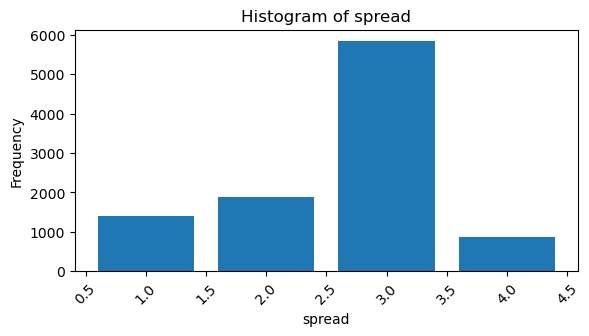

In [5]:
columns_to_plot = ['spread']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)

    volume_counts = df_ink[column].value_counts()

    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [6]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 15:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 15:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

def calculate_sw_mid(row):
    if row['ask_volume_1'] + row['bid_volume_1'] == 0:
        return None
    else:
        return (row['bid_price_1'] * row['ask_volume_1'] + row['ask_price_1'] * row['bid_volume_1']) / (row['ask_volume_1'] + row['bid_volume_1'])

df_ink['mm_mid'] = df_ink.apply(calculate_mm_mid, axis=1)
df_ink['sw_mid'] = df_ink.apply(calculate_sw_mid, axis=1)

In [7]:
#df_ink.drop(columns=['swmid'])
df_ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread,mm_mid,sw_mid
5,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0,3,1969.5,1969.500000
9,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0,2,1969.0,1969.228571
16,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0,3,1967.0,1966.130435
24,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0,3,1966.5,1966.500000
37,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0,2,1967.5,1967.612903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79961,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0,3,1831.5,1831.500000
79970,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0,2,1833.0,1833.555556
79981,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0,1,1833.5,1834.037037
79984,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0,2,1838.5,1838.928571


In [8]:
df_ink['mm_mid'].isnull().sum()

24

In [9]:
np.where(df_ink['mm_mid'].isnull())

(array([ 419, 2407, 3275, 3595, 3798, 5057, 5502, 6008, 6976, 7099, 7434,
        7463, 8037, 8450, 8588, 8777, 8792, 8843, 8892, 9269, 9332, 9471,
        9520, 9947], dtype=int64),)

<Figure size 1200x600 with 0 Axes>

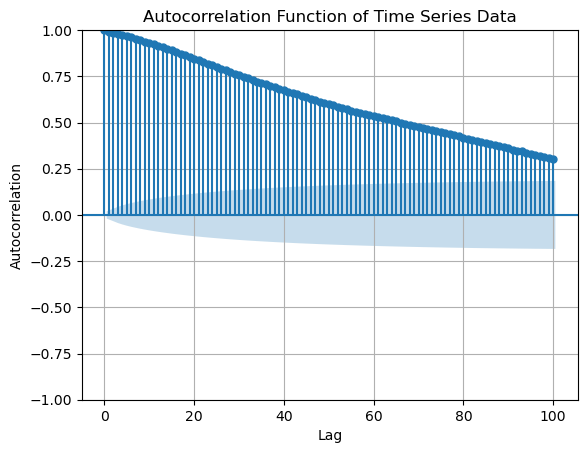

In [12]:
plt.figure(figsize=(12, 6))
ts = copy.deepcopy(df_ink[f'ret{i}']).dropna()
plot_acf(ts, lags=100)  # 指定要展示的滞后阶数
plt.title('Autocorrelation Function of Time Series Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [13]:
df_ink.iloc[np.where(df_ink['mm_mid'].isnull())]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,forward_ret30,ret30,forward_ret50,ret50,forward_ret100,ret100,forward_ret150,ret150,forward_ret200,ret200
3354,0,41900,SQUID_INK,1943,30,NaN,NaN,NaN,NaN,1944,...,0.003087,0.007912,0.003087,0.008671,0.003859,0.011445,0.002058,0.013201,0.002058,0.017690
19257,0,240700,SQUID_INK,1930,1,1929.0,5.0,1928.0,2.0,1931,...,-0.002072,0.001552,-0.000259,0.003613,-0.003108,-0.000259,-0.003108,0.003098,0.000000,0.001035
26204,0,327500,SQUID_INK,1943,14,NaN,NaN,NaN,NaN,1944,...,0.000515,-0.003356,-0.002058,-0.007778,-0.011834,-0.009610,-0.012349,-0.016475,-0.010291,-0.008039
28761,0,359500,SQUID_INK,1926,29,NaN,NaN,NaN,NaN,1927,...,0.000779,0.000000,-0.002336,-0.000519,0.002076,-0.001820,0.002595,-0.003124,0.004153,-0.005743
30385,0,379800,SQUID_INK,1932,24,NaN,NaN,NaN,NaN,1933,...,0.001035,0.000776,0.005175,0.000000,0.006210,0.000517,0.006727,-0.006248,0.011384,-0.003114
40463,0,505700,SQUID_INK,1912,1,1911.0,4.0,1910.0,9.0,1913,...,-0.002092,0.001827,-0.002876,-0.000785,-0.007059,-0.000262,-0.004967,0.001566,-0.002614,0.002608
44019,0,550200,SQUID_INK,1899,13,NaN,NaN,NaN,NaN,1902,...,-0.001052,0.004974,0.000263,0.003147,0.001579,0.000000,0.004999,0.002624,0.007366,0.007313
48065,0,600800,SQUID_INK,1920,13,NaN,NaN,NaN,NaN,1923,...,0.000520,-0.002609,0.000000,-0.002609,-0.006245,0.001559,-0.003123,0.001040,-0.012490,-0.000521
55810,0,697600,SQUID_INK,1881,12,NaN,NaN,NaN,NaN,1884,...,-0.001328,-0.002396,-0.006375,-0.005072,-0.003453,-0.003732,-0.003718,-0.004000,-0.007437,-0.002129
56799,0,709900,SQUID_INK,1877,13,NaN,NaN,NaN,NaN,1880,...,-0.001597,-0.002134,-0.001331,-0.003740,-0.004259,0.001064,-0.006920,0.001329,-0.004259,-0.001066


In [11]:
df_ink['mm_mid_fill'] = df_ink['mm_mid'].fillna(method='ffill')

In [17]:
for i in [1,3,5,10]:
    df_ink[f'forward_ret{i}'] = (df_ink['mm_mid_fill'].shift(-i) - df_ink['mm_mid_fill']) / df_ink['mm_mid_fill']
    df_ink[f'ret{i}'] = (df_ink['mm_mid_fill'].shift(i) - df_ink['mm_mid_fill']) / df_ink['mm_mid_fill'].shift(i)

In [15]:
for looking_back_window in [3,5,10,20,40,60,80,100,150]:
    for used_price in ['mid_price']:
        # Calculate the zscore of the used price in looking_back_window
        df_ink[f'{used_price}_zscore_{looking_back_window}'] = (df_ink[used_price] - df_ink[used_price].rolling(window=looking_back_window).mean()) / df_ink[used_price].rolling(window=looking_back_window).std()

In [18]:
plot = go.Figure()
plot.add_trace(go.Scatter(
    x=df_ink['timestamp']/100,
    y=df_ink['mid_price'],
    mode='lines+markers',
    name='SQUID_INK',
    line=dict(color='blue', width=2),
    marker=dict(size=5)
))


In [18]:
original_df_ink = copy.deepcopy(df[df['product'] == 'SQUID_INK'])
trade_df_ink = copy.deepcopy(trade_df[trade_df['symbol'] == 'SQUID_INK'])
#for i in [2158,3141,3392,4469,6354]:


In [41]:
original_df_ink['ret1'] = (-original_df_ink['mid_price'].shift(1) + original_df_ink['mid_price']) / original_df_ink['mid_price'].shift(1)
original_df_ink['forward_ret1'] = (df_ink['mid_price'].shift(-1) - df_ink['mid_price']) / df_ink['mid_price']
original_df_ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ret1,forward_ret1
5,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0,NaN,0.000254
9,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0,0.000254,-0.001269
16,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0,-0.001269,-0.000508
24,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0,-0.000508,0.000254
37,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0,0.000254,0.000508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79961,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0,0.000546,0.000819
79970,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0,0.000819,0.000818
79981,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0,0.000818,0.001908
79984,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0,0.001908,0.000816


In [13]:
df_ink['ret1'].describe()

count    9999.000000
mean        0.000007
std         0.000688
min        -0.004575
25%        -0.000511
50%         0.000000
75%         0.000511
max         0.006200
Name: ret1, dtype: float64

In [16]:
df_ink.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,sw_mid,forward_ret1,ret1,forward_ret3,ret3,forward_ret5,ret5,forward_ret10,ret10,mm_mid_fill
count,10000.0,10000.000000,10000.000000,10000.000000,2092.000000,2092.000000,157.000000,157.000000,10000.000000,10000.000000,...,10000.000000,9999.000000,9999.000000,9997.000000,9997.000000,9995.000000,9995.000000,9990.000000,9990.000000,10000.000000
mean,0.0,499950.000000,1906.529300,21.401900,1906.086042,24.320746,1904.108280,25.541401,1909.148000,20.394600,...,1907.865387,-0.000007,0.000007,-0.000020,0.000020,-0.000034,0.000034,-0.000069,0.000069,1907.869000
std,0.0,288689.567991,42.636258,10.167562,42.545604,6.830733,42.533182,4.497136,42.683056,10.117595,...,42.661187,0.000688,0.000688,0.001022,0.001022,0.001300,0.001300,0.001868,0.001868,42.661683
min,0.0,0.000000,1809.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,...,1810.500000,-0.006200,-0.004575,-0.010301,-0.008073,-0.012998,-0.009454,-0.015131,-0.011033,1810.500000
25%,0.0,249975.000000,1870.000000,21.000000,1869.000000,22.000000,1867.000000,23.000000,1872.000000,20.000000,...,1871.039259,-0.000511,-0.000511,-0.000534,-0.000530,-0.000770,-0.000767,-0.001058,-0.001039,1871.000000
50%,0.0,499950.000000,1916.000000,25.000000,1915.000000,25.000000,1910.000000,26.000000,1919.000000,24.000000,...,1917.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1917.500000
75%,0.0,749925.000000,1943.000000,28.000000,1942.000000,29.000000,1937.000000,29.000000,1945.000000,28.000000,...,1944.114224,0.000511,0.000511,0.000530,0.000534,0.000767,0.000770,0.001039,0.001058,1944.000000
max,0.0,999900.000000,1986.000000,40.000000,1984.000000,40.000000,1979.000000,36.000000,1987.000000,32.000000,...,1986.035714,0.004575,0.006200,0.008073,0.010301,0.009454,0.012998,0.011033,0.015131,1985.500000


In [14]:
df_ink[df_ink['ret1']<-0.001]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,sw_mid,forward_ret1,ret1,forward_ret3,ret3,forward_ret5,ret5,forward_ret10,ret10,mm_mid_fill
56,0,700,SQUID_INK,1967,32,NaN,NaN,NaN,NaN,1970,...,1968.627119,0.000000,-0.001017,0.000000,-0.000763,0.000508,-0.000508,0.001270,NaN,1968.5
166,0,2000,SQUID_INK,1972,19,NaN,NaN,NaN,NaN,1975,...,1973.266667,-0.000507,-0.001522,-0.000253,-0.001268,0.000507,-0.001014,0.000000,-0.002540,1973.5
198,0,2400,SQUID_INK,1975,10,1973.0,25.0,NaN,NaN,1976,...,1975.285714,-0.000506,-0.001267,-0.001266,-0.001521,-0.001012,-0.002537,-0.001519,-0.002537,1974.5
333,0,4100,SQUID_INK,1973,8,1972.0,23.0,NaN,NaN,1976,...,1973.750000,-0.001013,-0.001522,-0.001013,-0.001268,-0.001519,-0.001014,-0.000506,-0.001522,1974.0
497,0,6200,SQUID_INK,1973,30,NaN,NaN,NaN,NaN,1976,...,1974.500000,0.000000,-0.001522,0.000000,-0.000253,0.000000,-0.000760,0.001519,-0.000760,1974.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79697,0,996200,SQUID_INK,1838,1,1837.0,22.0,NaN,NaN,1841,...,1838.125000,-0.000272,-0.001634,0.000815,-0.004368,0.000544,-0.004917,0.000815,-0.007669,1839.0
79761,0,997000,SQUID_INK,1843,8,1841.0,21.0,NaN,NaN,1844,...,1843.275862,-0.000542,-0.001086,-0.001085,-0.001630,0.000542,-0.001358,-0.000542,-0.004085,1842.5
79794,0,997400,SQUID_INK,1844,23,NaN,NaN,NaN,NaN,1846,...,1845.642857,-0.000271,-0.001901,-0.001626,-0.001357,-0.000813,-0.001901,-0.001626,-0.002445,1845.5
79853,0,998100,SQUID_INK,1843,29,NaN,NaN,NaN,NaN,1846,...,1844.500000,-0.000542,-0.001085,-0.001355,-0.001085,-0.001898,0.000000,-0.007048,-0.001085,1844.5


In [15]:
df_ink[df_ink['ret1']<-0.001].describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,sw_mid,forward_ret1,ret1,forward_ret3,ret3,forward_ret5,ret5,forward_ret10,ret10,mm_mid_fill
count,746.0,746.000000,746.000000,746.000000,350.000000,350.000000,44.000000,44.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,745.000000,746.000000,745.000000,746.000000,745.000000,745.000000,746.000000
mean,0.0,507001.072386,1907.922252,15.320375,1905.808571,23.471429,1906.840909,24.727273,1910.312332,24.131367,...,1908.864246,-0.000267,-0.001330,-0.000240,-0.001024,-0.000185,-0.001002,-0.000176,-0.001034,1908.758713
std,0.0,308613.244809,43.560303,12.429259,44.437528,8.485824,43.823612,6.652028,43.619499,7.121866,...,43.605109,0.000845,0.000443,0.001114,0.001186,0.001470,0.001608,0.002105,0.002372,43.594564
min,0.0,700.000000,1813.000000,1.000000,1815.000000,1.000000,1814.000000,1.000000,1816.000000,1.000000,...,1814.500000,-0.006200,-0.004575,-0.006200,-0.008073,-0.007233,-0.009454,-0.008495,-0.010234,1814.500000
25%,0.0,240900.000000,1868.250000,1.000000,1864.000000,22.000000,1869.250000,23.000000,1871.000000,23.000000,...,1869.500000,-0.000708,-0.001532,-0.000810,-0.001579,-0.001037,-0.001800,-0.001318,-0.002209,1869.500000
50%,0.0,463250.000000,1920.000000,21.000000,1917.000000,25.500000,1922.500000,26.000000,1922.000000,26.000000,...,1920.486842,-0.000264,-0.001091,-0.000260,-0.001029,0.000000,-0.001021,0.000000,-0.001037,1920.500000
75%,0.0,834750.000000,1946.000000,27.000000,1944.000000,29.000000,1935.500000,29.000000,1948.000000,29.000000,...,1946.349206,0.000000,-0.001043,0.000508,-0.000516,0.000541,-0.000258,0.001022,0.000000,1946.500000
max,0.0,999800.000000,1984.000000,39.000000,1982.000000,39.000000,1978.000000,36.000000,1986.000000,32.000000,...,1984.500000,0.003235,-0.001009,0.005922,0.006200,0.005752,0.007226,0.008491,0.013510,1984.500000


In [19]:
original_df_ink.iloc[2158-10:2158+10]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
17190,0,214800,SQUID_INK,1925,30,NaN,NaN,NaN,NaN,1926,5,1928.0,28.0,NaN,NaN,1925.5,0.0
17194,0,214900,SQUID_INK,1928,22,NaN,NaN,NaN,NaN,1931,22,NaN,NaN,NaN,NaN,1929.5,0.0
17201,0,215000,SQUID_INK,1924,27,NaN,NaN,NaN,NaN,1927,27,NaN,NaN,NaN,NaN,1925.5,0.0
17209,0,215100,SQUID_INK,1928,26,NaN,NaN,NaN,NaN,1931,1,1932.0,25.0,NaN,NaN,1929.5,0.0
17222,0,215200,SQUID_INK,1927,20,NaN,NaN,NaN,NaN,1928,4,1930.0,20.0,NaN,NaN,1927.5,0.0
17227,0,215300,SQUID_INK,1928,27,NaN,NaN,NaN,NaN,1931,25,NaN,NaN,NaN,NaN,1929.5,0.0
17234,0,215400,SQUID_INK,1927,30,NaN,NaN,NaN,NaN,1928,5,1929.0,5.0,1930.0,30.0,1927.5,0.0
17241,0,215500,SQUID_INK,1927,27,NaN,NaN,NaN,NaN,1929,1,1930.0,27.0,NaN,NaN,1928.0,0.0
17254,0,215600,SQUID_INK,1924,29,NaN,NaN,NaN,NaN,1928,29,NaN,NaN,NaN,NaN,1926.0,0.0
17259,0,215700,SQUID_INK,1924,1,1923.0,21.0,NaN,NaN,1927,21,NaN,NaN,NaN,NaN,1925.5,0.0


In [20]:
original_df_ink.iloc[3141-10:3141+10]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
25051,0,313100,SQUID_INK,1909,30,NaN,NaN,NaN,NaN,1913,30,NaN,NaN,NaN,NaN,1911.0,0.0
25058,0,313200,SQUID_INK,1910,21,NaN,NaN,NaN,NaN,1912,6,1913.0,21.0,NaN,NaN,1911.0,0.0
25065,0,313300,SQUID_INK,1910,21,NaN,NaN,NaN,NaN,1912,8,1914.0,21.0,NaN,NaN,1911.0,0.0
25078,0,313400,SQUID_INK,1909,28,NaN,NaN,NaN,NaN,1913,28,NaN,NaN,NaN,NaN,1911.0,0.0
25083,0,313500,SQUID_INK,1909,29,NaN,NaN,NaN,NaN,1912,29,NaN,NaN,NaN,NaN,1910.5,0.0
25091,0,313600,SQUID_INK,1909,31,NaN,NaN,NaN,NaN,1912,1,1913.0,30.0,NaN,NaN,1910.5,0.0
25097,0,313700,SQUID_INK,1908,29,NaN,NaN,NaN,NaN,1911,22,NaN,NaN,NaN,NaN,1909.5,0.0
25110,0,313800,SQUID_INK,1908,26,NaN,NaN,NaN,NaN,1910,7,1911.0,26.0,NaN,NaN,1909.0,0.0
25117,0,313900,SQUID_INK,1909,26,NaN,NaN,NaN,NaN,1912,26,NaN,NaN,NaN,NaN,1910.5,0.0
25124,0,314000,SQUID_INK,1909,23,NaN,NaN,NaN,NaN,1911,3,1912.0,23.0,NaN,NaN,1910.0,0.0


In [21]:
trade_df_ink[(trade_df_ink['timestamp'] >= 214800) & (trade_df_ink['timestamp'] <= 216800)]

,timestamp,buyer,seller,symbol,currency,price,quantity
2853,214800,NaN,NaN,SQUID_INK,SEASHELLS,1926.0,5
2858,215800,NaN,NaN,SQUID_INK,SEASHELLS,1919.0,1
2860,215900,NaN,NaN,SQUID_INK,SEASHELLS,1920.0,7
2864,216000,NaN,NaN,SQUID_INK,SEASHELLS,1919.0,1
2865,216000,NaN,NaN,SQUID_INK,SEASHELLS,1921.0,1
2868,216400,NaN,NaN,SQUID_INK,SEASHELLS,1924.0,3
2871,216500,NaN,NaN,SQUID_INK,SEASHELLS,1925.0,1
2875,216600,NaN,NaN,SQUID_INK,SEASHELLS,1925.0,5
2876,216600,NaN,NaN,SQUID_INK,SEASHELLS,1925.0,7


In [22]:
df_ink_merge = pd.merge(df_ink, trade_df_ink[['timestamp','price','quantity']], on='timestamp', how='left')
df_ink_merge

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price_zscore_5,mid_price_zscore_10,mid_price_zscore_20,mid_price_zscore_40,mid_price_zscore_60,mid_price_zscore_80,mid_price_zscore_100,mid_price_zscore_150,price,quantity
0,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965.0,6.0
4,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,...,-0.706377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10391,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,...,0.000000,-0.616315,-1.262403,-1.374576,-1.023728,-1.187049,-1.393600,-1.797066,1830.0,2.0
10392,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,...,1.231174,0.063944,-0.890143,-1.153012,-0.836212,-1.041485,-1.252171,-1.656099,1832.0,1.0
10393,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,...,1.384699,1.789080,-0.540709,-0.892407,-0.642970,-0.898973,-1.115100,-1.517764,NaN,NaN
10394,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,...,1.532262,2.392378,0.176989,-0.209182,-0.194752,-0.598670,-0.831594,-1.232654,NaN,NaN


In [23]:
df_ink_merge['trade_bid'] = (df_ink_merge['price'] == df_ink_merge['bid_price_1'].shift(1))
df_ink_merge['trade_ask'] = (df_ink_merge['price'] == df_ink_merge['ask_price_1'].shift(1))
df_ink_merge['trade_spread'] = (df_ink_merge['price'] > df_ink_merge['bid_price_1'].shift(1)) & (df_ink_merge['price'] < df_ink_merge['ask_price_1'].shift(1))

In [24]:
df_ink_merge['price'].value_counts()

1958.0    49
1924.0    44
1957.0    43
1925.0    43
1921.0    42
          ..
1986.0     1
1814.0     1
1818.0     1
1817.0     1
1980.0     1
Name: price, Length: 174, dtype: int64

In [25]:
df_ink_merge['trade_bid'].value_counts()

False    9571
True      825
Name: trade_bid, dtype: int64

In [26]:

df_ink_merge['trade_ask'].value_counts()

False    9868
True      528
Name: trade_ask, dtype: int64

In [27]:

df_ink_merge['trade_spread'].value_counts()

False    9603
True      793
Name: trade_spread, dtype: int64

In [28]:
for i in [1,5,10,30,50,100,150,200]:
    print(df_ink.corrwith(df_ink[f'forward_ret{i}']))

day                          NaN
timestamp              -0.001019
bid_price_1            -0.014030
bid_volume_1            0.230413
bid_price_2            -0.024521
bid_volume_2            0.025601
bid_price_3            -0.045183
bid_volume_3           -0.019284
ask_price_1            -0.014822
ask_volume_1           -0.256518
ask_price_2            -0.032609
ask_volume_2           -0.078516
ask_price_3            -0.137496
ask_volume_3           -0.112118
mid_price              -0.014427
profit_and_loss              NaN
spread                 -0.041385
mm_mid                 -0.009506
sw_mid                 -0.010972
forward_ret1            1.000000
ret1                    0.207217
forward_ret5            0.447745
ret5                    0.081493
forward_ret10           0.330555
ret10                   0.037185
forward_ret30           0.182272
ret30                   0.025516
forward_ret50           0.134823
ret50                   0.022166
forward_ret100          0.092330
ret100    

In [29]:
plot = go.Figure()
plot.add_trace(go.Scatter(
    x=df_ink['timestamp'],
    y=df_ink['mid_price_zscore_60'],
    mode='lines+markers',
    name='SQUID_INK',
    line=dict(color='blue', width=2),
    marker=dict(size=5)
))


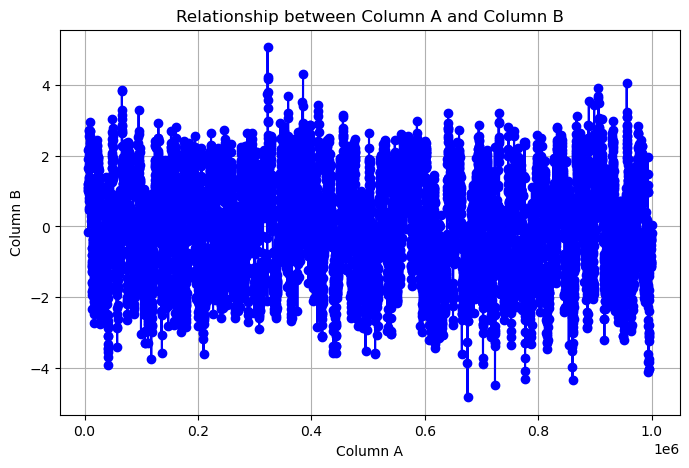

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(df_ink['timestamp'], df_ink['mid_price_zscore_60'], marker='o', color='b', linestyle='-')

# 添加标题和轴标签
plt.title('Relationship between Column A and Column B')
plt.xlabel('Column A')
plt.ylabel('Column B')

# 显示图形
plt.grid(True)
plt.show()

In [31]:
for threshold in [2,3]:
    for i in [3,5,10,20,40,60,80,100,150]:
        df_ink[f'long_signal_{i}_{threshold}'] = np.where(df_ink[f'mid_price_zscore_{i}'] > threshold, 1, 0)
        df_ink[f'short_signal_{i}_{threshold}'] = np.where(df_ink[f'mid_price_zscore_{i}'] < -threshold, -1, 0)
        df_ink[f'signal_{i}_{threshold}'] = df_ink[f'long_signal_{i}_{threshold}'] + df_ink[f'short_signal_{i}_{threshold}']

In [32]:
for threshold in [2,3]:
    for i in [3,5,10,20,40,60,80,100,150]:
        pnl = []
        # compute pnl
